### Assignment1

#### Task 1 (3 points):

Regression $\to$ Superconductivity Data Set

The goal here is to predict the critical temperature based on the features extracted.

https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data

* Fit two regression models to predict the critical temperature. Report the score with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) and plot the new obtained score as a function of the chosen parameter. Plot the coefficient magnitudes for the best model. 

In [ ]:
!pip install mglearn
!pip install wget
!pip install xlrd

In [2]:
# For practicing and learning purpose, I have run more models and plots than asked
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn # else, install using pip install mglearn
import wget # else, install using pip install wget
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00464/superconduct.zip"
wget.download(url)

from zipfile import ZipFile 
file_name = "superconduct.zip"
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file 
    zip.printdir() 
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
unique_m.csv                                   2018-10-12 08:25:44      4291603
train.csv                                      2018-10-12 08:25:04     23859780
Extracting all the files now...
Done!


In [4]:
# First read the data files
df_train=pd.read_csv("train.csv", sep=',')
df_train.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [5]:
# Convert df values into numpy arrays
X=df_train.iloc[:,:81].values # features
# Then predict using features
y=df_train.iloc[:,81].values
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=63)

In [6]:
# test everything is working
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor()
reg.fit(X_train,y_train)
# Let's print the accuracy using default parameters
print("Training set score: {:.2f}".format(reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(reg.score(X_test, y_test)))

Training set score: 0.92
Test set score: 0.88


In [7]:
# now fit two regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr = LinearRegression().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
print("Training set score using Linear Regression: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score using Linear Regression: {:.2f}".format(lr.score(X_test, y_test)))
print("Training set score using Ridge: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score using Ridge: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score using Linear Regression: 0.74
Test set score using Linear Regression: 0.74
Training set score using Ridge: 0.74
Test set score using Ridge: 0.74


Perform a simple manual optimization for one of the default parameters (at least 5 different values) and plot the new obtained score as a function of the chosen parameter. Plot the coefficient magnitudes for the best model.

Training set score: 0.74
Test set score: 0.74
Number of features used: 81
Alpha used:  1e-07
Training set score: 0.74
Test set score: 0.74
Number of features used: 81
Alpha used:  1e-05
Training set score: 0.74
Test set score: 0.74
Number of features used: 81
Alpha used:  0.0001
Training set score: 0.74
Test set score: 0.74
Number of features used: 81
Alpha used:  0.001
Training set score: 0.74
Test set score: 0.74
Number of features used: 81
Alpha used:  0.01
Training set score: 0.74
Test set score: 0.74
Number of features used: 81
Alpha used:  0.1
Training set score: 0.74
Test set score: 0.74
Number of features used: 81
Alpha used:  1


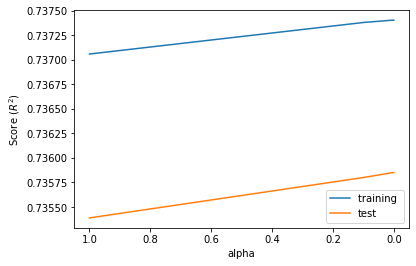

In [8]:
# Parameter (alpha) optimization for Ridge
training_accuracy = []
test_accuracy = []
alpha_settings = [0.0000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
for n in alpha_settings:
# build the model
    rdg = Ridge(alpha=n)
    rdg.fit(X_train, y_train)
# record training set accuracy
    training_accuracy.append(rdg.score(X_train, y_train))
# record generalization accuracy
    test_accuracy.append(rdg.score(X_test, y_test))
    print("Training set score: {:.2f}".format(rdg.score(X_train, y_train)))
    print("Test set score: {:.2f}".format(rdg.score(X_test, y_test)))
    print("Number of features used: {}".format(np.sum(rdg.coef_ != 0)))
    print("Alpha used: ", n)
def plot_temp_ridge_alpha():
    plt.plot(alpha_settings, training_accuracy, label="training ")
    plt.plot(alpha_settings, test_accuracy, label="test")
    plt.ylabel("Score ($R^2$)")
    plt.xlabel("alpha")
    plt.gca().invert_xaxis()
    plt.legend()

plot_temp_ridge_alpha()

Training set score: 0.74
Test set score: 0.74
Number of features used: 81
Alpha used:  auto
Training set score: 0.74
Test set score: 0.74
Number of features used: 81
Alpha used:  svd
Training set score: 0.74
Test set score: 0.74
Number of features used: 81
Alpha used:  cholesky
Training set score: 0.62
Test set score: 0.62
Number of features used: 81
Alpha used:  lsqr
Training set score: 0.67
Test set score: 0.67
Number of features used: 81
Alpha used:  sparse_cg
Training set score: 0.66
Test set score: 0.66
Number of features used: 81
Alpha used:  sag
Training set score: 0.65
Test set score: 0.64
Number of features used: 81
Alpha used:  saga


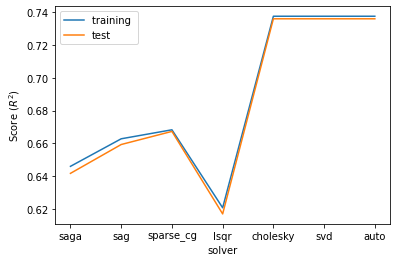

In [9]:
# Now change solver to test another parameter for this model
training_accuracy = []
test_accuracy = []
solv=['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
for n in solv:
# build the model
    rdg = Ridge(solver=n, alpha=0.0000001)
    rdg.fit(X_train, y_train)
# record training set accuracy
    training_accuracy.append(rdg.score(X_train, y_train))
# record generalization accuracy
    test_accuracy.append(rdg.score(X_test, y_test))
    print("Training set score: {:.2f}".format(rdg.score(X_train, y_train)))
    print("Test set score: {:.2f}".format(rdg.score(X_test, y_test)))
    print("Number of features used: {}".format(np.sum(rdg.coef_ != 0)))
    print("Alpha used: ", n)
def plot_temp_ridge_solver():
    plt.plot(solv, training_accuracy, label="training ")
    plt.plot(solv, test_accuracy, label="test")
    plt.ylabel("Score ($R^2$)")
    plt.xlabel("solver")
    plt.gca().invert_xaxis()
    plt.legend()

plot_temp_ridge_solver()

From the above outputs, it seems that lower the alpha is better, and three different solvers ('auto', 'svd', 'cholesky') are equally good. Let's plot the coef magnitudes for alpha=0.0000001 and solver='svd'

Text(0, 0.5, 'Coefficient magnitude')

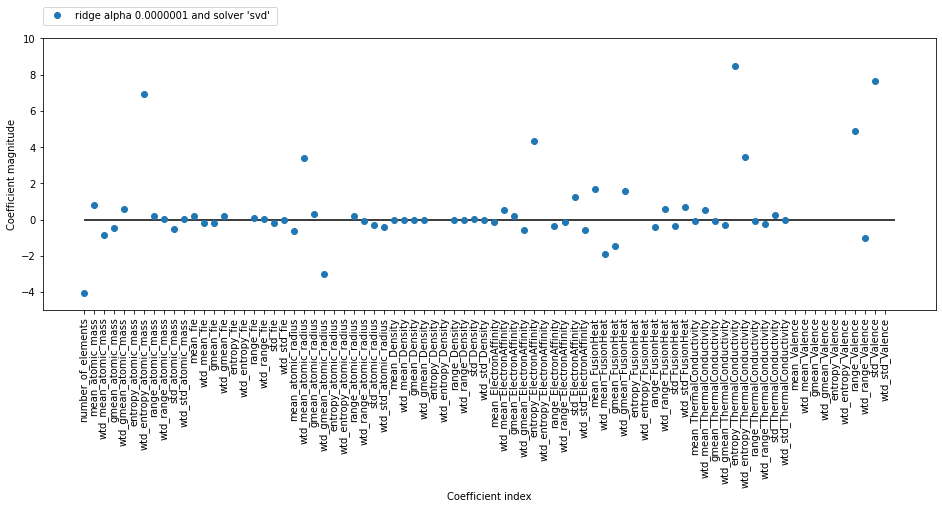

In [10]:
# plot coefficient magnitudes for the best model.
names = list(df_train.columns)
X_names = names[:81]
ridge = Ridge(alpha=0.0000001, solver='svd').fit(X_train, y_train)
plt.figure(figsize=(16,5))
plt.plot(ridge.coef_, 'o', label="ridge alpha 0.0000001 and solver 'svd' ")
plt.xticks(range(len(X_names)), X_names, rotation=90)
plt.hlines(0, 0,len(X_names))
plt.legend(ncol=1, loc=(0, 1.05))
plt.ylim(-5, 10)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In [11]:
def comparison_alpha_regression_models_figure():
    alpha_settings = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
    plt.figure(figsize=(16,5))
    for n in alpha_settings:
        lasso = Lasso(alpha=n, max_iter=100000).fit(X_train, y_train)
        ridge = Ridge(alpha=n).fit(X_train, y_train)
        alpha_as_str=str(n)
        lasso_label_text="Lasso alpha "+alpha_as_str
        ridge_label_text="Ridge alpha "+alpha_as_str
        plt.plot(lasso.coef_, 's', label=lasso_label_text)
        plt.plot(ridge.coef_, 'o', label=ridge_label_text)
    plt.xticks(range(len(X_names)), X_names, rotation=90)
    plt.hlines(0, 0,len(X_names))
    plt.legend(ncol=3, loc=(0, 1.05))
    plt.ylim(-5, 10)
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")

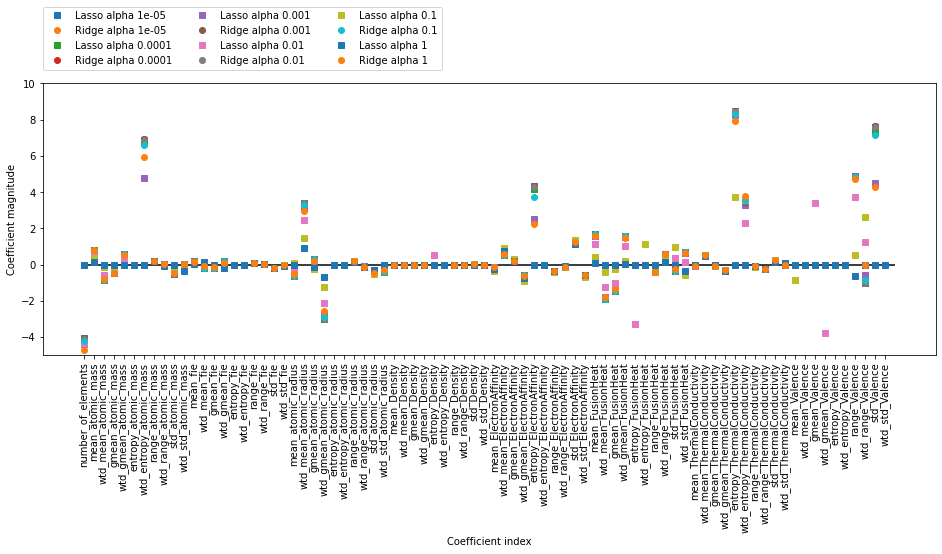

In [12]:
# run the below command only if you would like to test this. It takes long time to run this
comparison_alpha_regression_models_figure()

#### Task 2 (3 points):

Binary classification $\to$ Default of credit card clients Data Set

The goal here is to predict the default payment next month.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

* Fit two binary classification models to predict the client's credit card default. Report accuracy with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) and plot the new obtained accuracy as a function of the chosen parameter.. Plot the feature importance. 

# In this exercise, I have run multiple models and practiced. Therefore, it contains more contents than asked.

In [13]:
import wget # if not installed, install using !pip install wget
import requests
import xlrd # if not installed, install using !pip install xlrd

In [14]:
url2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default of credit card clients.xls"
wget.download(url2)

'default of credit card clients.xls'

In [15]:
df_cc=pd.read_excel("default of credit card clients.xls", header=1)

In [16]:
# Convert df values into numpy arrays
X_cc=df_cc.iloc[:,:23].values # features

# Then predict using features
y_cc=df_cc.iloc[:,23].values

from sklearn.model_selection import train_test_split
# train_test_split?
X_cc_train, X_cc_test, y_cc_train, y_cc_test=train_test_split(X_cc, y_cc, random_state=63)

In [17]:
# now fit two classification models
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
# LogisticRegression took around 30 minutes to finish the run
logreg = LogisticRegression().fit(X_cc_train, y_cc_train) 
lsvc=LinearSVC().fit(X_cc_train, y_cc_train)
print("Training set score using LogisticRegression: {:.2f}".format(logreg.score(X_cc_train, y_cc_train)))
print("Test set score using LogisticRegression: {:.2f}".format(logreg.score(X_cc_test, y_cc_test)))
print("Training set score using LinearSVC: {:.2f}".format(lsvc.score(X_cc_train, y_cc_train)))
print("Test set score using LinearSVC: {:.2f}".format(lsvc.score(X_cc_test, y_cc_test)))

Training set score using LogisticRegression: 0.22
Test set score using LogisticRegression: 0.21
Training set score using LinearSVC: 0.00
Test set score using LinearSVC: 0.00


In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5).fit(X_cc_train, y_cc_train)
#ridge = Ridge().fit(X_train, y_train)
print("Training set score using KNeighborsClassifier: {:.2f}".format(knn.score(X_cc_train, y_cc_train)))
print("Test set score using KNeighborsClassifier: {:.2f}".format(knn.score(X_cc_test, y_cc_test)))

Training set score using KNeighborsClassifier: 0.37
Test set score using KNeighborsClassifier: 0.21


In [19]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to wherever
# neighbors_settings = list(range(1, 100)) # this takes time
neighbors_settings = [1, 5, 10, 20, 50, 100] # testing this to save time
for n in neighbors_settings:
# build the model
    knn = KNeighborsClassifier(n_neighbors=n).fit(X_cc_train, y_cc_train)
# record training set accuracy
    training_accuracy.append(knn.score(X_cc_train, y_cc_train))
# record generalization accuracy
    test_accuracy.append(knn.score(X_cc_test, y_cc_test))

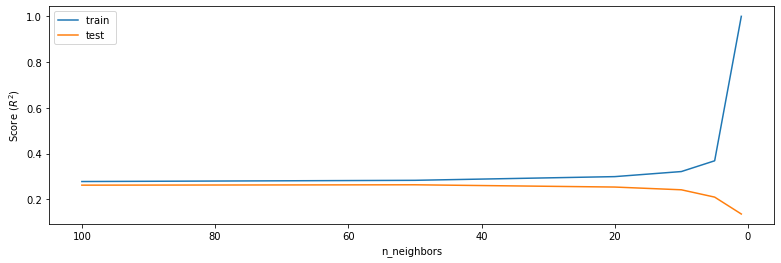

In [20]:
def plot_payment_knn_n_neighbors():
    plt.figure(figsize=(13,4))
    plt.plot(neighbors_settings, training_accuracy, label="train ")
    plt.plot(neighbors_settings, test_accuracy, label="test")
    plt.ylabel("Score ($R^2$)")
    plt.xlabel("n_neighbors")
    plt.gca().invert_xaxis()
    plt.legend()

plot_payment_knn_n_neighbors()

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0).fit(X_cc_train, y_cc_train)
print("Training set score using DecisionTreeClassifier: {:.2f}".format(tree.score(X_cc_train, y_cc_train)))
print("Test set score using DecisionTreeClassifier: {:.2f}".format(tree.score(X_cc_test, y_cc_test)))

Training set score using DecisionTreeClassifier: 1.00
Test set score using DecisionTreeClassifier: 0.18


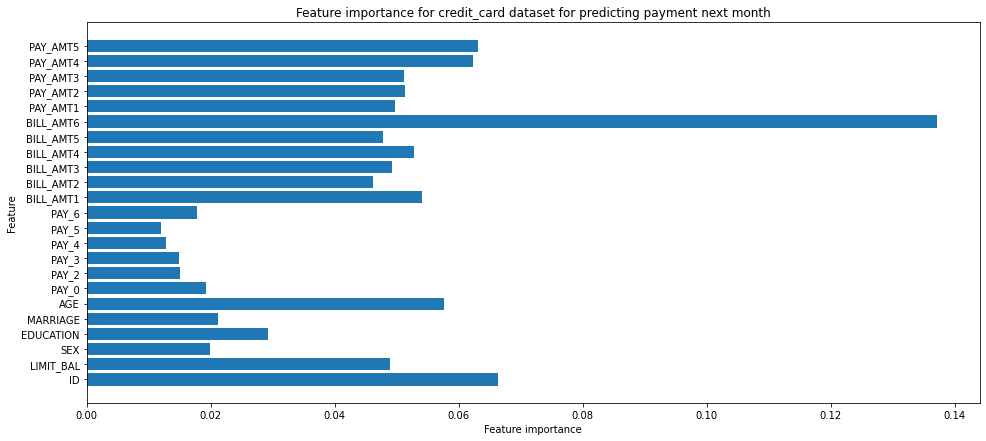

In [22]:
names_cc = list(df_cc.columns)
X_cc_names = names_cc[:23]
def plot_feature_importances_cc_data(model):
    n_features = X_cc.shape[1]
    plt.figure(figsize=(16,7))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_cc_names)
    plt.title('Feature importance for credit_card dataset for predicting payment next month')
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cc_data(tree)

In [23]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_cc_train, y_cc_train)
print("Training set score using GaussianNB: {:.2f}".format(gnb.score(X_cc_train, y_cc_train)))
print("Test set score using GaussianNB: {:.2f}".format(gnb.score(X_cc_test, y_cc_test)))

Training set score using GaussianNB: 0.24
Test set score using GaussianNB: 0.00


In [24]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, random_state=0).fit(X_cc_train, y_cc_train)
print("Training set score using RandomForestClassifier: {:.2f}".format(forest.score(X_cc_train, y_cc_train)))
print("Test set score using RandomForestClassifier: {:.2f}".format(forest.score(X_cc_test, y_cc_test)))

Training set score using RandomForestClassifier: 0.94
Test set score using RandomForestClassifier: 0.24


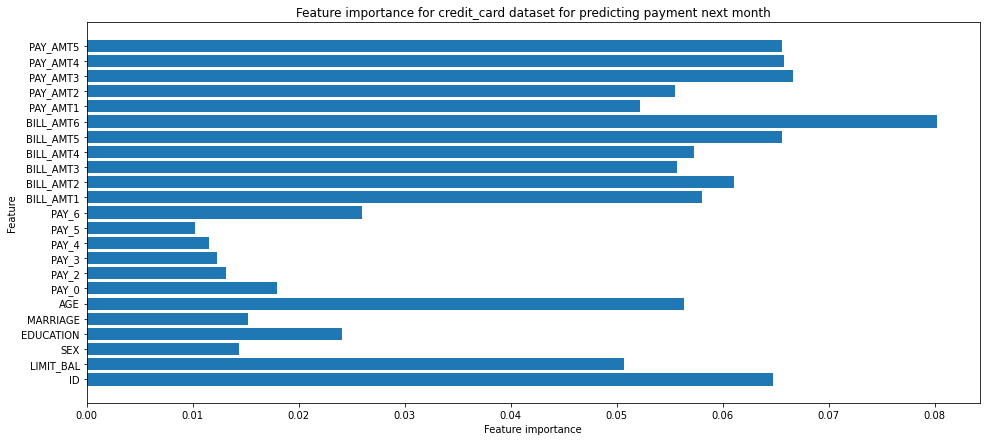

In [25]:
plot_feature_importances_cc_data(forest)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# This model might take forever to run :(
gbrt = GradientBoostingClassifier(random_state=0).fit(X_cc_train, y_cc_train)
print("Training set score using GradientBoostingClassifier: {:.2f}".format(gbrt.score(X_cc_train, y_cc_train)))
print("Test set score using GradientBoostingClassifier: {:.2f}".format(gbrt.score(X_cc_test, y_cc_test)))

#### Task 3 (9 points): 

Multiclass & binary classification $\to$ Drug consumption (quantified) Data Set

https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Data Set Information:

Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.

Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

* Fit two multiclass classification models to predict two selected features out of 18. Use numerical values to represent each class. Report accuracy with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) for one of the previous models. Plot the new obtained accuracy as a function of the chosen parameter. 
* Fit one multiclass classification model for all the rest 16 features. Comment on the accuracy of predicting each feature, for all the seven classes. 
* Run one binary classification model for 3 features out of 18. Test the performance of the model by choosing as:
 - one class (class 0) the variable "Used in Last Decade" and the remaining variables for the other class (class 1).
 - one class (class 0) the variables "Used in Last Decade" and "Used in Last Year" and the remaining variables for the other class (class 1).
 - one class (class 0) the variables "Used in Last Decade", "Used in Last Year", "Used in Last Month" and the remaining variables for the other class (class 1).
 
 Comment your results, and point which selection of classes have better accuracy.

In [3]:
url3 = "https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data"
df_drug = pd.read_csv(url3, header=None)
df_drug.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [4]:
col_names=['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA']
len(col_names)

32

In [5]:
df_drug.columns=col_names
df_drug.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [6]:
drug_cols = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
           'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']
from sklearn.preprocessing import LabelEncoder
for i in drug_cols:
    df_drug[i] = LabelEncoder().fit_transform(df_drug[i])
df_drug.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,2,0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,4,0,2,0,2,3,0,4,0,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,0,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,2,0,0,0,0,2,0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,2,2,0,0


In [7]:
# df_drug.info()
df_drug.shape

(1885, 32)

# Fit two multiclass classification models to predict two selected features out of 18. Use numerical values to represent each class. Report accuracy with the default parameters of each model.

In [8]:
from sklearn.model_selection import train_test_split
df_drug_q1=df_drug.copy()
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
predicted_class_name_1 = ['Alcohol'] # selecting 'Alcohol' as the first feature
predicted_class_name_2 = ['Meth'] # selecting 'Meth' as the first feature
X = df_drug_q1[feature_col_names].values
y_drug_1 = df_drug_q1[predicted_class_name_1].values
y_drug_2 = df_drug_q1[predicted_class_name_2].values
X_train, X_test, y_train_1, y_test_1 = train_test_split(X, y_drug_1, random_state=63)
X_train, X_test, y_train_2, y_test_2 = train_test_split(X, y_drug_2, random_state=63)

Training set score using GaussianNB for alcohol: 0.38
Test set score using GaussianNB for alcohol: 0.38
Training set score using GaussianNB for meth: 0.68
Test set score using GaussianNB for meth: 0.66
Confusion matrix for drug 1 using GaussianNB: 
 [[  1   0   0   0   0   4   3]
 [  1   0   0   0   0   4   4]
 [  1   0   0   0   0   6  11]
 [  0   1   0   5   2  30  21]
 [  1   1   0   3   2  44  21]
 [  3   3   0   8   3 116  50]
 [  2   6   0   1   3  55  56]]
Confusion matrix for drug2 using GaussianNB: 
 [[296   0  13  19   9   3   8]
 [  6   0   0   0   0   0   0]
 [ 13   0   3   4   6   1   3]
 [ 21   0   6   8   4   1   1]
 [  2   0   5   4   3   1   0]
 [  4   0   4   2   0   0   1]
 [  9   1   3   6   0   1   1]]


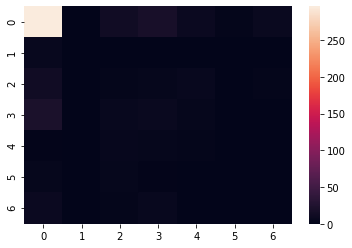

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
gnb1 = GaussianNB().fit(X_train, y_train_1.ravel())
gnb2 = GaussianNB().fit(X_train, y_train_2.ravel())
y_pred_1 = gnb1.predict(X_test)
y_pred_2 = gnb2.predict(X_test)
print("Training set score using GaussianNB for alcohol: {:.2f}".format(gnb1.score(X_train, y_train_1)))
print("Test set score using GaussianNB for alcohol: {:.2f}".format(gnb1.score(X_test, y_test_1)))
print("Training set score using GaussianNB for meth: {:.2f}".format(gnb2.score(X_train, y_train_2)))
print("Test set score using GaussianNB for meth: {:.2f}".format(gnb2.score(X_test, y_test_2)))
print("Confusion matrix for drug 1 using GaussianNB: \n", confusion_matrix(y_test_1, y_pred_1))
# sns.heatmap(confusion_matrix(y_test_1, y_pred_1))
print("Confusion matrix for drug2 using GaussianNB: \n", confusion_matrix(y_test_2, y_pred_2))
sns.heatmap(confusion_matrix(y_test_2, y_pred_2))

In [10]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier().fit(X_train, y_train_1)
tree2 = DecisionTreeClassifier().fit(X_train, y_train_2)
print("Training set score using DecisionTreeClassifier for alcohol: {:.2f}".format(tree1.score(X_train, y_train_1)))
print("Test set score using DecisionTreeClassifier for alcohol: {:.2f}".format(tree1.score(X_test, y_test_1)))
print("Training set score using DecisionTreeClassifier for meth: {:.2f}".format(tree2.score(X_train, y_train_2)))
print("Test set score using DecisionTreeClassifier for meth: {:.2f}".format(tree2.score(X_test, y_test_2)))

Training set score using DecisionTreeClassifier for alcohol: 1.00
Test set score using DecisionTreeClassifier for alcohol: 0.31
Training set score using DecisionTreeClassifier for meth: 1.00
Test set score using DecisionTreeClassifier for meth: 0.62


In [11]:
from sklearn.ensemble import RandomForestClassifier
forest1 = DecisionTreeClassifier().fit(X_train, y_train_1)
forest2 = DecisionTreeClassifier().fit(X_train, y_train_2)
print("Training set score using RandomForestClassifier for alcohol: {:.2f}".format(forest1.score(X_train, y_train_1)))
print("Test set score using RandomForestClassifier for alcohol: {:.2f}".format(forest1.score(X_test, y_test_1)))
print("Training set score using RandomForestClassifier for meth: {:.2f}".format(forest2.score(X_train, y_train_2)))
print("Test set score using RandomForestClassifier for meth: {:.2f}".format(forest2.score(X_test, y_test_2)))

Training set score using RandomForestClassifier for alcohol: 1.00
Test set score using RandomForestClassifier for alcohol: 0.31
Training set score using RandomForestClassifier for meth: 1.00
Test set score using RandomForestClassifier for meth: 0.60


Training set score using SVC for alcohol: 0.48
Test set score using SVC for alcohol: 0.38
Training set score using SVC for meth: 0.77
Test set score using SVC for meth: 0.74
Confusion matrix for drug2 using SVC: 
 [[348   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0]
 [ 30   0   0   0   0   0   0]
 [ 41   0   0   0   0   0   0]
 [ 15   0   0   0   0   0   0]
 [ 11   0   0   0   0   0   0]
 [ 21   0   0   0   0   0   0]]


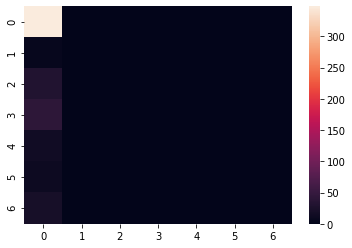

In [12]:
from sklearn.svm import SVC
#svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X_hc, y_hc)
svm1=SVC().fit(X_train, y_train_1.ravel())
svm2=SVC().fit(X_train, y_train_2.ravel())
print("Training set score using SVC for alcohol: {:.2f}".format(svm1.score(X_train, y_train_1)))
print("Test set score using SVC for alcohol: {:.2f}".format(svm1.score(X_test, y_test_1)))
print("Training set score using SVC for meth: {:.2f}".format(svm2.score(X_train, y_train_2)))
print("Test set score using SVC for meth: {:.2f}".format(svm2.score(X_test, y_test_2)))
y_pred_1 = svm1.predict(X_test)
y_pred_2 = svm2.predict(X_test)
print("Confusion matrix for drug2 using SVC: \n", confusion_matrix(y_test_2, y_pred_2))
sns.heatmap(confusion_matrix(y_test_2, y_pred_2))

# Perform a simple manual optimization for one of the default parameters (at least 5 different values) for one of the previous models. Plot the new obtained accuracy as a function of the chosen parameter.

Training set score: 0.73
Test set score: 0.72
Kernel used:  sigmoid
Training set score: 0.77
Test set score: 0.74
Kernel used:  linear
Training set score: 0.79
Test set score: 0.74
Kernel used:  poly
Training set score: 0.77
Test set score: 0.74
Kernel used:  rbf


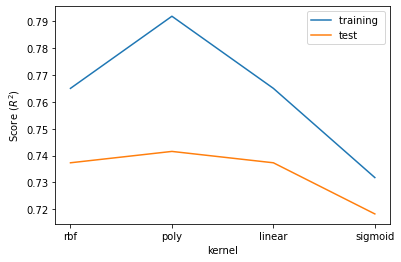

In [13]:
# Test different kernel of SVC model to test for 'meth' (class) prediction
training_accuracy = []
test_accuracy = []
kernel=['sigmoid', 'linear', 'poly', 'rbf']
for i in kernel:
# build the model
    svm=SVC(kernel=i).fit(X_train, y_train_2.ravel())
# record training set accuracy
    training_accuracy.append(svm.score(X_train, y_train_2))
# record generalization accuracy
    test_accuracy.append(svm.score(X_test, y_test_2))
    print("Training set score: {:.2f}".format(svm.score(X_train, y_train_2)))
    print("Test set score: {:.2f}".format(svm.score(X_test, y_test_2)))
    print("Kernel used: ", i)
def plot_kernel_svm():
    plt.plot(kernel, training_accuracy, label="training ")
    plt.plot(kernel, test_accuracy, label="test")
    plt.ylabel("Score ($R^2$)")
    plt.xlabel("kernel")
    plt.gca().invert_xaxis()
    plt.legend()

plot_kernel_svm()

Training set score: 0.77
Test set score: 0.74
C used:  0.001
Training set score: 0.77
Test set score: 0.74
C used:  0.01
Training set score: 0.77
Test set score: 0.74
C used:  0.1
Training set score: 0.79
Test set score: 0.74
C used:  1
Training set score: 0.88
Test set score: 0.71
C used:  10
Training set score: 0.95
Test set score: 0.64
C used:  100
Training set score: 0.99
Test set score: 0.61
C used:  1000
Training set score: 1.00
Test set score: 0.59
C used:  10000


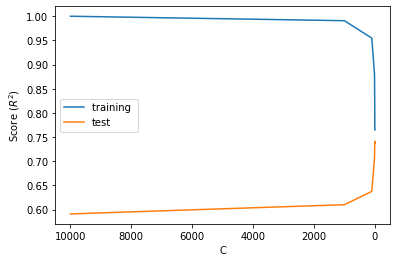

In [14]:
# Now use the 'poly' kernel but test different values of C
training_accuracy = []
test_accuracy = []
c_settings = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
for i in c_settings:
# build the model
    svm=SVC(kernel='poly', C=i).fit(X_train, y_train_2.ravel())
# record training set accuracy
    training_accuracy.append(svm.score(X_train, y_train_2))
# record generalization accuracy
    test_accuracy.append(svm.score(X_test, y_test_2))
    print("Training set score: {:.2f}".format(svm.score(X_train, y_train_2)))
    print("Test set score: {:.2f}".format(svm.score(X_test, y_test_2)))
    print("C used: ", i)
def plot_C_svm():
    plt.plot(c_settings, training_accuracy, label="training ")
    plt.plot(c_settings, test_accuracy, label="test")
    plt.ylabel("Score ($R^2$)")
    plt.xlabel("C")
    plt.gca().invert_xaxis()
    plt.legend()

plot_C_svm()

# Fit one multiclass classification model for all the rest 16 features. Comment on the accuracy of predicting each feature, for all the seven classes.

In [15]:
#drug_cols = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']
df_drug_q3=df_drug.copy()
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
# Although we were asked to predic rest of the 16 features, I am includinig all the 18 features for model prediction.
# The already calculated 2 features can serve as an internal control to check that the model is predicting r2 correctly
predict_col_names=['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']
X = df_drug_q3[feature_col_names].values
training_accuracy = []
test_accuracy = []
# Now I'll predcit all the drug features/columns using SVC 
for i in predict_col_names:
    predicted_col=[i]
    y = df_drug_q3[predicted_col].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=63)
    svm=SVC(kernel='poly').fit(X_train, y_train.ravel())
    training_accuracy.append(svm.score(X_train, y_train))
    test_accuracy.append(svm.score(X_test, y_test))

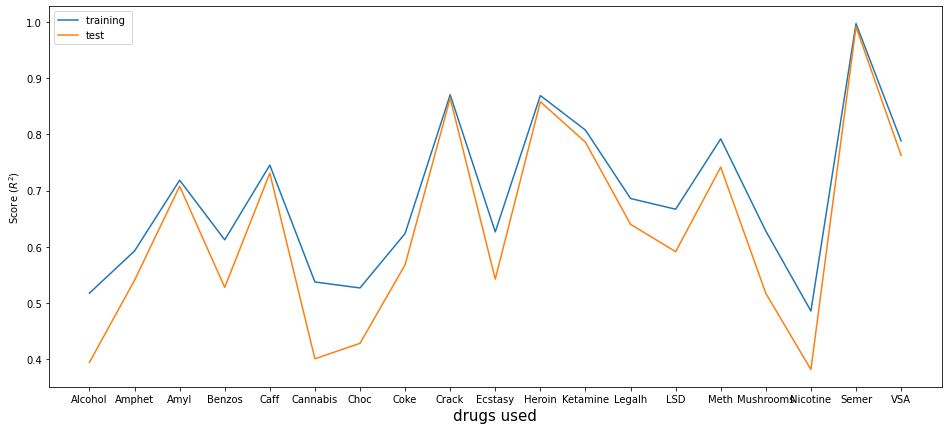

In [16]:
def plot_features_svm():
    plt.figure(figsize=(16,7))
    plt.plot(predict_col_names, training_accuracy, label="training ")
    plt.plot(predict_col_names, test_accuracy, label="test")
    plt.ylabel("Score ($R^2$)")
    plt.xlabel("drugs used", fontsize=15)
    plt.gca()
    plt.legend()

plot_features_svm()

Now let's see the drug usage patterns (distribition across 7 classes) to understand the model outcome

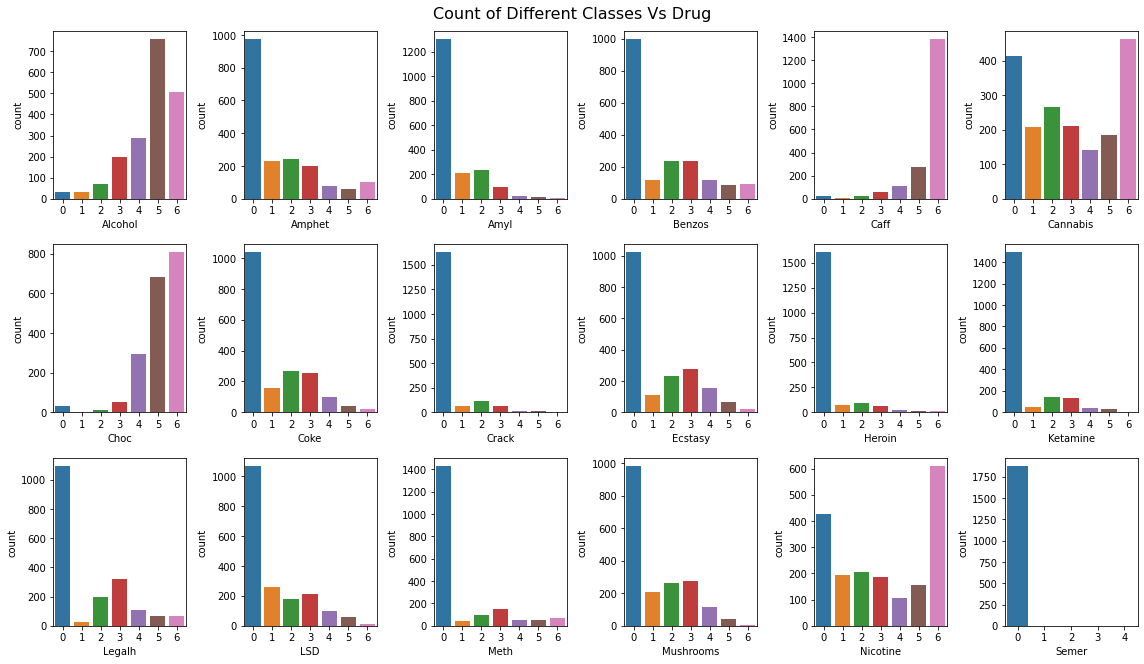

In [17]:
# Let's plot a countplot to understand the data better. This might help to interprete the model's prediction
import seaborn as sns
fig, axes = plt.subplots(3,6,figsize = (16,9))
fig.suptitle("Count of Different Classes Vs Drug", y=1.02, fontsize=16)
k=0
for i in range(3):
    for j in range(6):
        sns.countplot(x=drug_cols[k], data=df_drug_q3, ax=axes[i][j])
        k+=1

plt.tight_layout()
plt.show()

From the above countplots we can observe 2 types of drugs: 
    1) those used quite frequently and 
    2) those used quite rarely
The classification model predictions are also shaped by the above mentioned classes.
For instance, the model prediction is poor when a drug is commonly used (e.g. alcohol, cannabis, choc, nicotine etc.).
Similarly, the prediction was stronger for the drugs that are used rarely by the users (e.g. crack, heroine, meth, semer etc.)

# Run one binary classification model for 3 features out of 18. Test the performance of the model by choosing as:
one class (class 0) the variable "Used in Last Decade" and the remaining variables for the other class (class 1).
one class (class 0) the variables "Used in Last Decade" and "Used in Last Year" and the remaining variables for the other class (class 1).
one class (class 0) the variables "Used in Last Decade", "Used in Last Year", "Used in Last Month" and the remaining variables for the other class (class 1).

Comment your results, and point which selection of classes have better accuracy.

In [18]:
# Let's create a new drug class (first model)

drug_cols = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
           'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'VSA']
new_drug_cols = ['new_Alcohol','new_Amphet', 'new_Amyl', 'new_Benzos', 'new_Caff', 'new_Cannabis', 'new_Choc', 'new_Coke', 'new_Crack',
           'new_Ecstasy', 'new_Heroin', 'new_Ketamine', 'new_Legalh', 'new_LSD', 'new_Meth', 'new_Mushrooms','new_Nicotine', 'new_VSA']

df_drug_q3_cp_1=df_drug_q3.copy()
df_drug_q3_cp_2=df_drug_q3.copy()
df_drug_q3_cp_3=df_drug_q3.copy()
for i in range(len(drug_cols)):
    df_drug_q3_cp_1.loc[((df_drug_q3_cp_1[drug_cols[i]]==0) | (df_drug_q3_cp_1[drug_cols[i]]==1) | (df_drug_q3_cp_1[drug_cols[i]]==2)), new_drug_cols[i]] = 0
    df_drug_q3_cp_1.loc[((df_drug_q3_cp_1[drug_cols[i]]==3) | (df_drug_q3_cp_1[drug_cols[i]]==4) | (df_drug_q3_cp_1[drug_cols[i]]==5) | (df_drug_q3_cp_1[drug_cols[i]]==6)), new_drug_cols[i]] = 1
for i in range(len(drug_cols)):
    df_drug_q3_cp_2.loc[((df_drug_q3_cp_2[drug_cols[i]]==0) | (df_drug_q3_cp_2[drug_cols[i]]==1) | (df_drug_q3_cp_2[drug_cols[i]]==2) | (df_drug_q3_cp_2[drug_cols[i]]==3)), new_drug_cols[i]] = 0
    df_drug_q3_cp_2.loc[((df_drug_q3_cp_2[drug_cols[i]]==4) | (df_drug_q3_cp_2[drug_cols[i]]==5) | (df_drug_q3_cp_2[drug_cols[i]]==6)), new_drug_cols[i]] = 1
for i in range(len(drug_cols)):
    df_drug_q3_cp_3.loc[((df_drug_q3_cp_3[drug_cols[i]]==0) | (df_drug_q3_cp_3[drug_cols[i]]==1) | (df_drug_q3_cp_3[drug_cols[i]]==2) | (df_drug_q3_cp_3[drug_cols[i]]==3) | (df_drug_q3_cp_3[drug_cols[i]]==4)), new_drug_cols[i]] = 0
    df_drug_q3_cp_3.loc[((df_drug_q3_cp_3[drug_cols[i]]==5) | (df_drug_q3_cp_3[drug_cols[i]]==6)), new_drug_cols[i]] = 1
# Now set the new columns' data types as integer
for i in new_drug_cols:
    df_drug_q3_cp_1 = df_drug_q3_cp_1.astype({i: int})
    df_drug_q3_cp_2 = df_drug_q3_cp_2.astype({i: int})
    df_drug_q3_cp_3 = df_drug_q3_cp_3.astype({i: int})

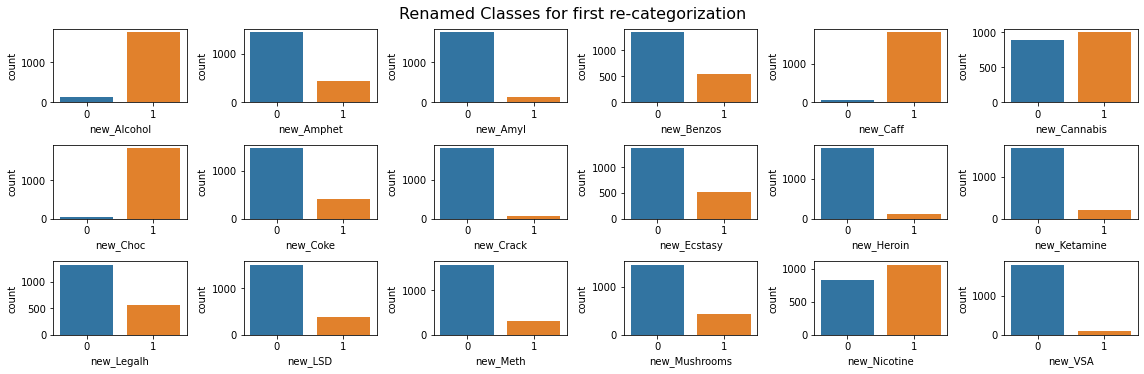

In [19]:
# Let's plot countplots to observe the new classes
import seaborn as sns
fig, axes = plt.subplots(3,6,figsize = (16,5))
fig.suptitle("Renamed Classes for first re-categorization", y=1.03, fontsize=16)
k=0
for i in range(3):
    for j in range(6):
        sns.countplot(x=new_drug_cols[k], data=df_drug_q3_cp_1, ax=axes[i][j])
        k+=1

plt.tight_layout()
plt.show()

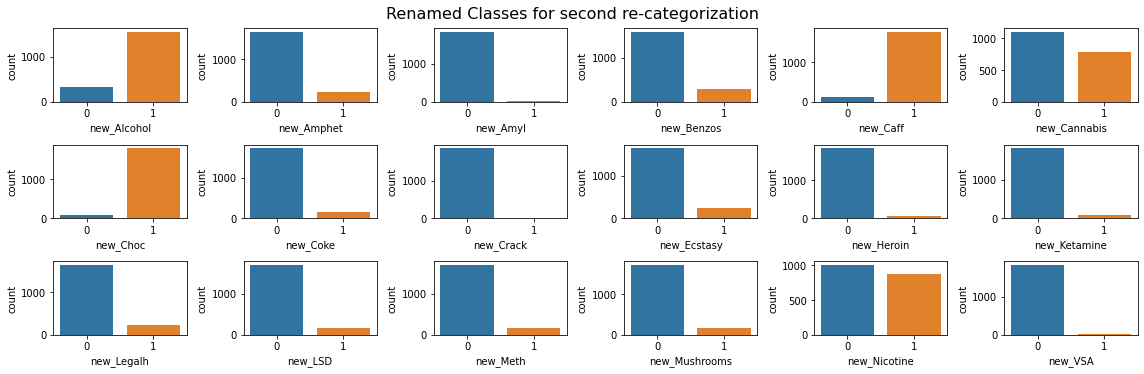

In [20]:
# Let's plot countplots to observe the second new classes
import seaborn as sns
fig, axes = plt.subplots(3,6,figsize = (16,5))
fig.suptitle("Renamed Classes for second re-categorization", y=1.03, fontsize=16)
k=0
for i in range(3):
    for j in range(6):
        sns.countplot(x=new_drug_cols[k], data=df_drug_q3_cp_2, ax=axes[i][j])
        k+=1

plt.tight_layout()
plt.show()

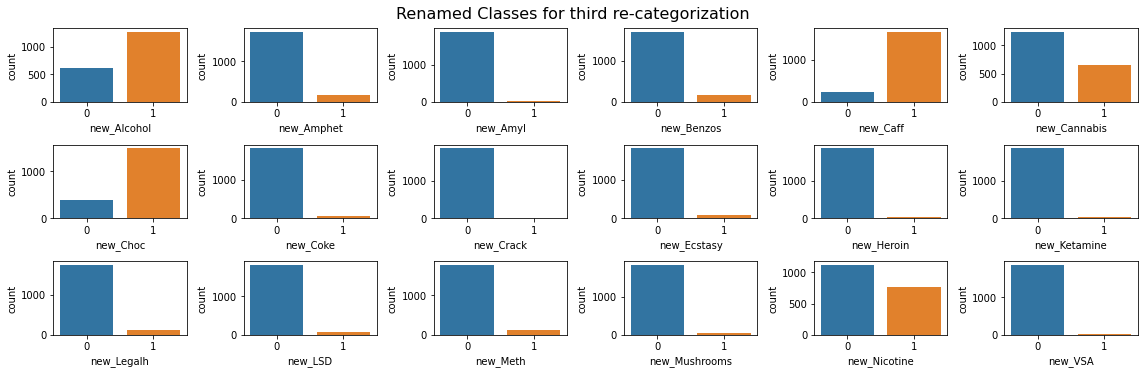

In [21]:
# Let's plot countplots to observe the third new classes
# There are 18 features. I'll plot the first 15 just to observe the new classes
import seaborn as sns
fig, axes = plt.subplots(3,6,figsize = (16,5))
fig.suptitle("Renamed Classes for third re-categorization", y=1.03, fontsize=16)
k=0
for i in range(3):
    for j in range(6):
        sns.countplot(x=new_drug_cols[k], data=df_drug_q3_cp_3, ax=axes[i][j])
        k+=1

plt.tight_layout()
plt.show()

In [22]:
from sklearn.svm import LinearSVC
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
# Although we were asked to predic rest of the 16 features, I am includinig all the 18 features for model prediction.
# The already calculated 2 features can serve as an internal control to check that the model is predicting r2 correctly
#predict_col_names=['new_Alcohol','new_Amphet', 'new_Amyl', 'new_Benzos', 'new_Caff', 'new_Cannabis', 'new_Choc', 'new_Coke', 'new_Crack',
           #'new_Ecstasy', 'new_Heroin', 'new_Ketamine', 'new_Legalh', 'new_LSD', 'new_Meth', 'new_Mushrooms','new_Nicotine', 'new_Semer', 'new_VSA']
predict_col_names=['new_Alcohol','new_Amphet', 'new_Amyl', 'new_Benzos', 'new_Caff', 'new_Cannabis', 'new_Choc', 'new_Coke', 'new_Crack',
           'new_Ecstasy', 'new_Heroin', 'new_Ketamine', 'new_Legalh', 'new_LSD', 'new_Meth', 'new_Mushrooms','new_Nicotine', 'new_VSA']
X = df_drug_q3_cp_1[feature_col_names].values
training_accuracy = []
test_accuracy = []
# Now I'll predcit all the drug features/columns using SVC 
for i in predict_col_names:
    predicted_col=[i]
    y = df_drug_q3_cp_1[predicted_col].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=63)
    svm=LinearSVC(max_iter=10000).fit(X_train, y_train.ravel())
    training_accuracy.append(svm.score(X_train, y_train))
    test_accuracy.append(svm.score(X_test, y_test))

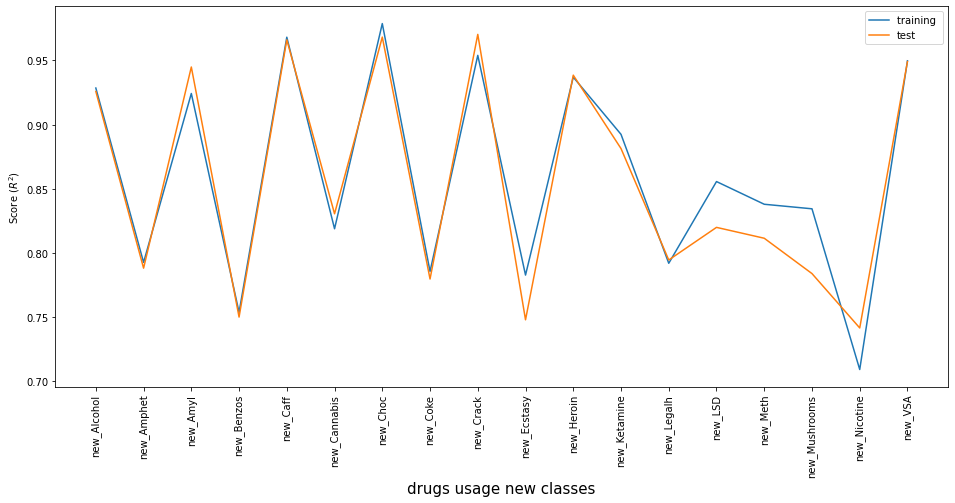

In [23]:

plt.figure(figsize=(16,7))
plt.plot(predict_col_names, training_accuracy, label="training ")
plt.plot(predict_col_names, test_accuracy, label="test")
plt.ylabel("Score ($R^2$)")
plt.xlabel("drugs usage new classes", fontsize=15)
plt.xticks(rotation=90)
plt.gca()
plt.legend()

# Run one binary classification model for 3 features out of 18. Test the performance of the model by choosing as:

one class (class 0) the variable "Used in Last Decade" and the remaining variables for the other class (class 1).

one class (class 0) the variables "Used in Last Decade" and "Used in Last Year" and the remaining variables for the other class (class 1).

one class (class 0) the variables "Used in Last Decade", "Used in Last Year", "Used in Last Month" and the remaining variables for the other class (class 1).


In [24]:
from sklearn.svm import LinearSVC
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
# Although we were asked to predic rest of the 16 features, I am includinig all the 18 features for model prediction.
# The already calculated 2 features can serve as an internal control to check that the model is predicting r2 correctly
predict_col_names=['new_Alcohol','new_Amphet', 'new_Amyl', 'new_Benzos', 'new_Caff', 'new_Cannabis', 'new_Choc', 'new_Coke', 'new_Crack',
           'new_Ecstasy', 'new_Heroin', 'new_Ketamine', 'new_Legalh', 'new_LSD', 'new_Meth', 'new_Mushrooms','new_Nicotine', 'new_VSA']
X = df_drug_q3_cp_1[feature_col_names].values
training_accuracy_1 = []
test_accuracy_1 = []
training_accuracy_2 = []
test_accuracy_2 = []
training_accuracy_3 = []
test_accuracy_3 = []
# Now I'll predcit all the drug features/columns using SVC 
for i in predict_col_names:
    predicted_col=[i]
    y1 = df_drug_q3_cp_1[predicted_col].values
    y2 = df_drug_q3_cp_2[predicted_col].values
    y3 = df_drug_q3_cp_3[predicted_col].values
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y1, random_state=63)
    X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y2, random_state=63)
    X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y3, random_state=63)
    svm_1=LinearSVC(max_iter=10000).fit(X_train_1, y_train_1.ravel())
    svm_2=LinearSVC(max_iter=10000).fit(X_train_2, y_train_2.ravel())
    svm_3=LinearSVC(max_iter=10000).fit(X_train_3, y_train_3.ravel())
    training_accuracy_1.append(svm_1.score(X_train_1, y_train_1))
    test_accuracy_1.append(svm_1.score(X_test_1, y_test_1))
    training_accuracy_2.append(svm_2.score(X_train_2, y_train_2))
    test_accuracy_2.append(svm_2.score(X_test_2, y_test_2))
    training_accuracy_3.append(svm_3.score(X_train_3, y_train_3))
    test_accuracy_3.append(svm_3.score(X_test_3, y_test_3))

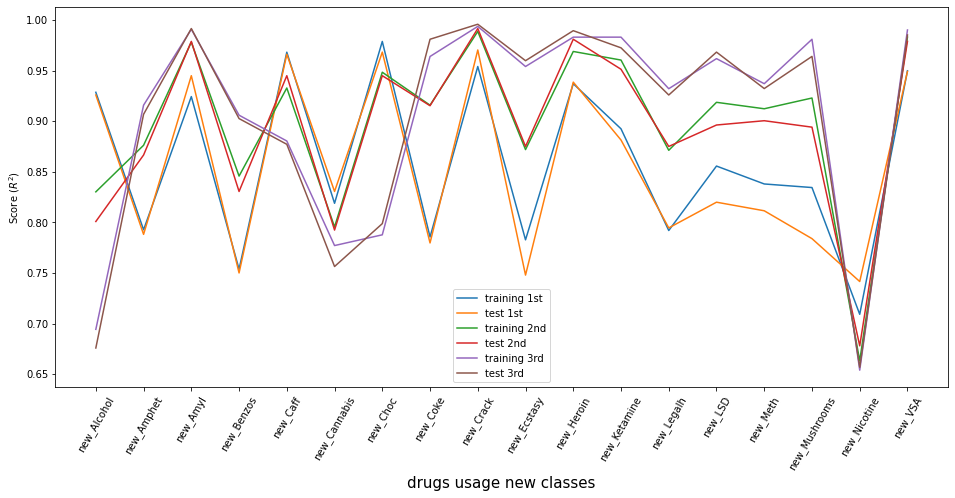

In [25]:
plt.figure(figsize=(16,7))
plt.plot(predict_col_names, training_accuracy_1, label="training 1st")
plt.plot(predict_col_names, test_accuracy_1, label="test 1st")
plt.plot(predict_col_names, training_accuracy_2, label="training 2nd")
plt.plot(predict_col_names, test_accuracy_2, label="test 2nd")
plt.plot(predict_col_names, training_accuracy_3, label="training 3rd")
plt.plot(predict_col_names, test_accuracy_3, label="test 3rd")
plt.ylabel("Score ($R^2$)")
plt.xlabel("drugs usage new classes", fontsize=15)
plt.xticks(rotation=60)
plt.gca()
plt.legend()

Conclusions according to my observations:
    1) binary classification scored better over multi-class classification for the same dataset/problem
    2) The overall prediction trend/score is similar to the multi-class classification, i.e. prediction was stronger for the drugs that are used rarely by the users (e.g. crack, heroine etc.)
    3) Binary classification set 3 (i.e. categories 0 to 4 (=0) and categories 5-6 (=1)) scored better for rare used drugs and vice versa